In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, train_test_split
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
data=pd.read_csv("phase2_output.csv")

In [2]:
data.shape

(59400, 21)

In [3]:
print(data['status_group'].value_counts())

0    32259
2    22824
1     4317
Name: status_group, dtype: int64


converted the target variable also into numerical

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             59400 non-null  int64  
 1   status_group           59400 non-null  int64  
 2   funder                 59400 non-null  float64
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   basin                  59400 non-null  float64
 7   district_code          59400 non-null  int64  
 8   population             59400 non-null  int64  
 9   public_meeting         59400 non-null  float64
 10  scheme_name            59400 non-null  float64
 11  permit                 59400 non-null  float64
 12  construction_year      59400 non-null  int64  
 13  extraction_type_class  59400 non-null  float64
 14  management             59400 non-null  float64
 15  pa

From the above dataset information, all the features are converted into numerical for modelling

In [5]:
data.isnull().sum()

Unnamed: 0               0
status_group             0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
district_code            0
population               0
public_meeting           0
scheme_name              0
permit                   0
construction_year        0
extraction_type_class    0
management               0
payment                  0
water_quality            0
quantity                 0
source                   0
source_class             0
waterpoint_type          0
dtype: int64

From the above informaiton,there is no missing data and all the missing data is replaced

In [6]:
data=data.drop(columns=['Unnamed: 0']) 

it is a serial number column after exporting data into CSV file

In [7]:
X=data.drop(columns=['status_group'])
y=data['status_group']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splitting the data randomly Train data: 80% and test data: 20%

In [8]:
# creating summary datafframe to store all the metrics and information
summary= pd.DataFrame(columns=["Model",'Train data_F1 score','Test data_F1score','Crossvalid_mean','Crossvalid_std','Grid_bestscore'])

F1 Score:
TRAIN dataset : 0.75
TEST dataset  : 0.68


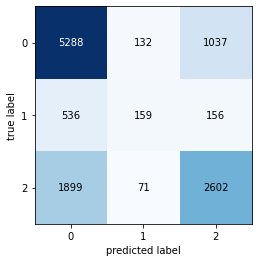

In [9]:
KN = KNeighborsClassifier(7) # no.of neighbours chosen are 7
#fitting the train data input variables and target variables
KN.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = KN.predict(X_train)
y_pred_test = KN.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()


Choosing the K nearest Neighbours as a base line model. Choosing the F1 score as a evaluation metric for checking model performance.

In [10]:
#Finding the best hyperparameters for improving the performance of the model using gridsearch
grid_p = {"n_neighbors":[3,4,5,7],"weights":["uniform","distance"],
          "algorithm":["auto","ball_tree","kd_tree","brute"],"leaf_size":[15,25,30]}

grid_search = GridSearchCV(KN, grid_p, n_jobs=-1, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best=grid_search.best_score_
grid_search.best_params_

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 7, 'weights': 'distance'}

Best hyperparameters for K-nearest neighbours using gridsearch are:{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 7, 'weights': 'distance'}

In [11]:
metric = cross_val_score(KN, X, y, cv=5, scoring='f1_micro')
print(metric.mean(), "+/-", metric.std()) 
summary.loc[len(summary.index)] = ['K Nearest Neighbours',F1_train,F1_test, round(metric.mean(),2),
                                   round(metric.std(),3),round(best,2)] 

0.673080808080808 +/- 0.003686215215061574


From the cross validation score, mean is nearly equal to actual f1_score.standard deviation is very less, which shows the robustness of KNN model after splitting the data randomly multiple times also.

F1 Score:
TRAIN dataset : 0.7
TEST dataset  : 0.7


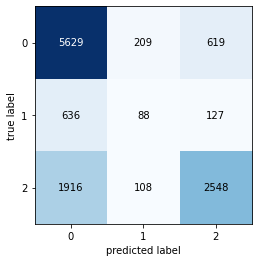

In [12]:
 #fitting the train data input variables and target variables
GNB = GaussianNB().fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = GNB.predict(X_train) 
# predicting the target varible from input variable of test data
y_pred_test = GNB.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2) #evaluation metric
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_test) 
plot_confusion_matrix(cm)
plt.show()


In [13]:
#Finding the best hyperparameters for improving the performance of the model using gridsearch
grid_p = {"var_smoothing":[1e-07,1e-09]}

grid_search = GridSearchCV(GNB, grid_p, n_jobs=-1, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best=grid_search.best_score_
grid_search.best_params_


{'var_smoothing': 1e-09}

Best hyperparameters for Naive bayes using gridsearch are:{'var_smoothing': 1e-09}

In [14]:
metric = cross_val_score(GNB, X, y, cv=5, scoring='f1_micro')
print(metric.mean(), "+/-", metric.std()) 
summary.loc[len(summary.index)] = ['Naive Bayes',F1_train,F1_test, round(metric.mean(),2),
                                   round(metric.std(),3),round(best,2)] 

0.6979797979797979 +/- 0.003654788711977432


From the cross validation score, mean is nearly equal to actual f1_score.standard deviation is very less, which shows the robustness of Naive bayes model after splitting the data randomly multiple times also.

F1 Score:
TRAIN dataset : 0.81
TEST dataset  : 0.77


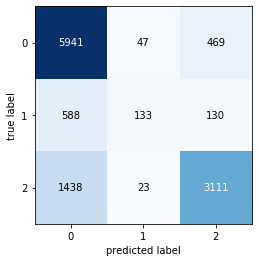

In [15]:
#choosing the hyperparameters based on dataset
XGB = XGBClassifier(objective = 'multi:softmax', booster = 'gbtree',num_class = 3,
                    eta = .1,max_depth = 7, colsample_bytree = .4, 
                    learning_rate = 0.1,max_delta_step=1)
#fitting the train data input variables and target variables
XGB.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = XGB.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = XGB.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()


In [16]:
#Finding the best hyperparameters for improving the performance of the model using gridsearch
grid_p = {"learning_rate":[0.1,1,10],"max_depth":[3,5,7,10]}
grid_search = GridSearchCV(XGB, grid_p, n_jobs=-1, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best=grid_search.best_score_
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 10}

Best hyperparameters for XGBoost using gridsearch are:{'learning_rate': 0.1, 'loss': 'log_loss', 'max_depth': 10}

In [17]:
metric = cross_val_score(XGB, X, y, cv=5, scoring='f1_micro')
print(metric.mean(), "+/-", metric.std()) 
summary.loc[len(summary.index)] = ['XGboost',F1_train,F1_test, round(metric.mean(),2),
                                   round(metric.std(),3),round(best,2)] 

0.7725252525252525 +/- 0.002390690944089324


From the cross validation score, mean is nearly equal to actual f1_score.standard deviation is very less, which shows the robustness of XGboost model after splitting the data randomly multiple times also.

F1 Score:
TRAIN dataset : 0.87
TEST dataset  : 0.74


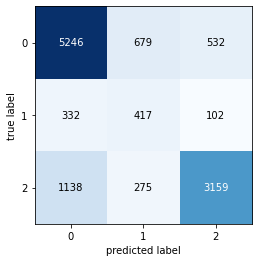

In [18]:
#choosing the hyperparameters based on dataset
RF = RandomForestClassifier(n_estimators=50, random_state=42,
                            n_jobs=-1,class_weight='balanced',max_depth=15,max_features=15)
#fitting the train data input variables and target variables
RF.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = RF.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = RF.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()


In [19]:
#Finding the best hyperparameters for improving the performance of the model using gridsearch
grid_p = {"n_estimators": [20, 50, 100],"criterion": ["gini", "entropy"],
          "max_features": ['sqrt', 'log2'],"min_samples_split": [2, 5, 10]}

grid_search = GridSearchCV(RF, grid_p, n_jobs=-1, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best=grid_search.best_score_
grid_search.best_params_


{'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 100}

Best hyperparameters for Randomforest using gridsearch are:{'criterion': 'gini',
 'max_features': 'sqrt','min_samples_split': 2,'n_estimators': 100}

In [20]:
metric = cross_val_score(RF, X, y, cv=5, scoring='f1_micro')
print(metric.mean(), "+/-", metric.std()) 
summary.loc[len(summary.index)] = ['Randomforest',F1_train,F1_test,round(metric.mean(),2), 
                                   round(metric.std(),3),round(best,2)] 

0.7390740740740741 +/- 0.0047343228290330245


From the cross validation score, mean is nearly equal to actual f1_score.standard deviation is very less, which shows the robustness of Random Forest model after splitting the data randomly multiple times also.

F1 Score:
TRAIN dataset : 0.7
TEST dataset  : 0.7


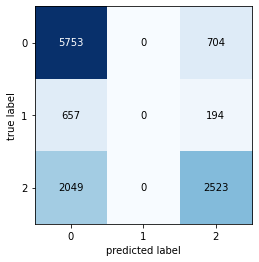

In [21]:
#choosing the hyperparameters based on dataset
DT = DecisionTreeClassifier(criterion = "gini",
            random_state = 100,max_depth=3, min_samples_leaf=5)
#fitting the train data input variables and target variables
DT.fit(X_train, y_train)
# predicting the target varible from input variable of train data
y_pred = DT.predict(X_train)
# predicting the target varible from input variable of test data
y_pred_test = DT.predict(X_test)
print("F1 Score:")
F1_train=round(f1_score(y_train, y_pred,average='micro'),2)
F1_test=round(f1_score(y_test, y_pred_test,average='micro'),2)
print("TRAIN dataset :",F1_train)
print("TEST dataset  :",F1_test)
# creating confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm)
plt.show()
  

In [22]:
#Finding the best hyperparameters for improving the performance of the model using gridsearch
grid_p = {"criterion":['gini','entropy','log_loss'],"random_state":[50,100,200],
                       "max_depth":range(1,10),"min_samples_leaf":range(1,5)}

grid_search = GridSearchCV(DT, grid_p, n_jobs=-1, cv=5, scoring='f1_micro')
grid_search.fit(X_train, y_train)
best=grid_search.best_score_
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'random_state': 200}

Best hyperparameters for Decision Tree using gridsearch are:{'criterion': 'gini',
 'max_depth': 9,'min_samples_leaf': 1,'random_state': 200}

In [23]:
metric = cross_val_score(DT, X, y, cv=5, scoring='f1_micro')
print(metric.mean(), "+/-", metric.std()) 
summary.loc[len(summary.index)] = ['Decision Tree',F1_train,F1_test,round(metric.mean(),2), 
                                   round(metric.std(),3),round(best,2)] 

0.6959259259259258 +/- 0.0035263634291668646


From the cross validation score, mean is nearly equal to actual f1_score.standard deviation is very less, which shows the robustness of Decision Tree model after splitting the data randomly multiple times also.

In [24]:
summary


,Model,Train data_F1 score,Test data_F1score,Crossvalid_mean,Crossvalid_std,Grid_bestscore
0,K Nearest Neighbours,0.75,0.68,0.67,0.004,0.67
1,Naive Bayes,0.70,0.70,0.70,0.004,0.70
2,XGboost,0.81,0.77,0.77,0.002,0.78
3,Randomforest,0.87,0.74,0.74,0.005,0.75
4,Decision Tree,0.70,0.70,0.70,0.004,0.74


# Summary
1.Base line model and Decision Tree has same performance metric with initial selected hyperparameters
2.Using Gridsearch provided parameters Decision Tree F1_score increase to 4%
3.Randomforest model has highest train data F1_score
4.XGBoost model has highest test data F1_score
5.XGBoost model has highest cross validation mean,less std deviation and it is evident that XGboost is more robust 
6.Using K-fold cross validation, all the models F1_score didn't change much with multiple random splitting of data
7.
